# Text by the Numbers: Working with One Text

**A Reproducible Research Workshop**

(A Collaboration between Dartmouth Library and Research Computing)

[*Click here to view or register for our current list of workshops*](http://dartgo.org/RRADworkshops)

*This notebook created by*:
+ Version 1.0: Jeremy Mikecz, Research Data Services (Dartmouth Library)

<!--
+ Some of the inspiration for the code and information in this notebook was taken from https://www.w3schools.com/python/python_intro.asp -- This is a great resource if you want to learn more about Python!-->

**How can we use computational techniques to analyze texts and then visualize patterns buried within them?** 

**What can we learn about texts by applying text analysis in Python? How do we get started?**

This is **Notebook 1** of 2 for the **Text by the Numbers: Text Analysis Methods in Python** workshop:
+ **Notebook 1: Text by the Numbers: Working with one text**
+ Notebook 2: Text by the Numbers 2: Working with a Corpus

In this session, participants will:

+ Learn how to write basic scripts in Python using Jupyter Notebooks
+ import and pre-process documents (into lists of words or tokens, lower-case each word, remove "stopwords", etc.)
+ analyze each document using word frequencies, collocations, ngram frequencies, etc.

**Table of Contents**

+ Part I: Navigating through the files in a directory (whether on your computer or on a remote server)
+ Part II. Divide a text into tokens
+ Part III: Counting Words
+ Part IV: NLTK functions

## Part I: Navigating through the files in a directory (whether on your computer or on a remote server)

1. We will use the **Path** function from the **pathlib** library to navigate through our files.

In [1]:
from pathlib import Path

2. Next, we need to use this Path function to set the directory where we will get our data.

In [2]:
textdir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
pathlist = list(Path.iterdir(textdir))
print([path.name for path in pathlist])

['Adams_1797.txt', 'Adams_1798.txt', 'Adams_1799.txt', 'Adams_1800.txt', 'Adams_1825.txt', 'Adams_1826.txt', 'Adams_1827.txt', 'Adams_1828.txt', 'Arthur_1881.txt', 'Arthur_1882.txt', 'Arthur_1883.txt', 'Arthur_1884.txt', 'Biden_2021.txt', 'Biden_2022.txt', 'Biden_2023.txt', 'Buchanan_1857.txt', 'Buchanan_1858.txt', 'Buchanan_1859.txt', 'Buchanan_1860.txt', 'Buren_1837.txt', 'Buren_1838.txt', 'Buren_1839.txt', 'Buren_1840.txt', 'Bush_1989.txt', 'Bush_1990.txt', 'Bush_1991.txt', 'Bush_1992.txt', 'Bush_2001.txt', 'Bush_2002.txt', 'Bush_2003.txt', 'Bush_2004.txt', 'Bush_2005.txt', 'Bush_2006.txt', 'Bush_2007.txt', 'Bush_2008.txt', 'Carter_1978.txt', 'Carter_1979.txt', 'Carter_1980.txt', 'Carter_1981.txt', 'Cleveland_1885.txt', 'Cleveland_1886.txt', 'Cleveland_1887.txt', 'Cleveland_1888.txt', 'Cleveland_1893.txt', 'Cleveland_1894.txt', 'Cleveland_1895.txt', 'Cleveland_1896.txt', 'Clinton_1993.txt', 'Clinton_1994.txt', 'Clinton_1995.txt', 'Clinton_1996.txt', 'Clinton_1997.txt', 'Clinton_1998

3. Let's open one text from this dataset.

In [3]:
with open(Path(textdir,"Bush_2002.txt"), encoding='utf-8') as f:
    text1 = f.read()

4. What do the following blocks of code do? Run them and then share your answer.

In [4]:
print(len(text1))
print(text1[:50])
print(text1[0:50])
print("***\n")
print(text1[50:100])
print("***\n")
print(text1[-50:])
text1[-50:-1]          #print function not necessary for the final line in a cell

22617
Thank you very much. Mr. Speaker, Vice President C
Thank you very much. Mr. Speaker, Vice President C
***

heney, Members of Congress,
distinguished guests, 
***

 freedom's victory.

Thank you all. May God bless.


" freedom's victory.\n\nThank you all. May God bless"

<div class="alert alert-info" role="alert" style="color:blue"><h3>Exercise for Part I</h3>
    
<p>4b. Choose another text in this corpus (or another!) to analyze. Open, read, and save it into memory adapting from the code in Step 3.</p>
</div>

## Part II. Divide a text into tokens

Often the first step in computational text analysis is to **tokenize** a text into separate tokens. "Tokens" can be words, but also punctuation, sets of numbers, etc.

5. There are different ways to tokenize a text. 

    a. The simplest way is to use the split function to split a text on each space: `text1.split()`. However, that leaves punctuation attached to adjacent words.

    ```
    tokens1 = text1.split()
    ```
    
    b. The **Natural Language Toolkit (nltk)** package also provides two tools for tokenizing texts. The **word_tokenize()** method separates punctuation into different tokens. 

    ```
    tokens2 = nltk.word_tokenize(text1)
    ```

    c. Finally, we can use NLTK's **RegexpTokenizer** to remove most punctuation (but, it keeps punctuation that is considered part of a word, such as the period in "Mr." or "Dr.".) This is the method we use below.



In [5]:
import nltk
from nltk import RegexpTokenizer  
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text1)
print(tokens[:30])
print(len(tokens))

['Thank', 'you', 'very', 'much', 'Mr', 'Speaker', 'Vice', 'President', 'Cheney', 'Members', 'of', 'Congress', 'distinguished', 'guests', 'fellow', 'citizens', 'As', 'we', 'gather', 'tonight', 'our', 'Nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession']
3875


<div class="alert alert-info" role="alert" style="color:blue"><h3>Exercises for Part II</h3>
    
<p>6. Tokenize your chosen text using one of the above three methods.</p>
</div>

## III. Counting Words

7. We can count the length of a text using the **len()** function. Run the following two lines of code below. What is the difference between the two?

In [6]:
print(len(text1))
print(len(tokens))

22617
3875


7. We can create a **frequency list** of words (ahem... tokens) using the **Counter()** function from the Python **collections** library. 

In [7]:
import collections
tokfreqs = collections.Counter(tokens)
tokfreqs.most_common(20)         #to view the 60 most common items in tokfreqs

[('and', 189),
 ('the', 161),
 ('of', 123),
 ('to', 121),
 ('in', 68),
 ('our', 65),
 ('a', 64),
 ('we', 51),
 ('will', 49),
 ('is', 44),
 ('We', 34),
 ('I', 34),
 ('America', 33),
 ('have', 32),
 ('on', 30),
 ('that', 29),
 ('for', 23),
 ('be', 23),
 ('with', 22),
 ('this', 21)]

8. What do you notice? How can we make this frequency list more revealing?

**9. We can convert all the tokens to lower-case.**

In [8]:
ltokens = [tok.lower() for tok in tokens]  
print(ltokens[:20])

['thank', 'you', 'very', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'of', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'as', 'we', 'gather', 'tonight']


**10. We often want to remove stopwords**. **Stop words** are common words that reveal little about the meaning of a text (such as articles like "the", conjunctions like "and", prepositions like "on", pronouns like "our", and helper verbs like "can"). Fortunately, NLTK provides a list of stop words in English (and other languages as well) that we can use to eliminate all such words from our texts.

Let's examine stopwords in English:

In [9]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

11. What if you work with another language? Let's print out the language options for NLTK's stopwords:

In [10]:
# languages in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


<div class="alert alert-info" role="alert" style="color:blue"><b>Exercises</b>
    <p>12. Now try to print out stopwords from a language of your choice (using the same code we used above to print out English stopwords):</p>
</div>

13. Returning to our English stopwords list, we can further modify our ltokens list by removing stopwords:

In [11]:
stop = stopwords.words('english')
stop = sorted(stop)
ltokens_ns = [tok for tok in ltokens if tok not in stop]        #list comprehension removes all stopwords from ltokens2

print("We had", len(ltokens), "tokens in our ltoken2 list.")
print("beginning with:", ltokens[:30], " \n")

print("After removing stop words, we now have", len(ltokens_ns), "tokens in our list.")
print("beginning with:", ltokens_ns[:30])

We had 3875 tokens in our ltoken2 list.
beginning with: ['thank', 'you', 'very', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'of', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'as', 'we', 'gather', 'tonight', 'our', 'nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession']  

After removing stop words, we now have 2098 tokens in our list.
beginning with: ['thank', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'gather', 'tonight', 'nation', 'war', 'economy', 'recession', 'civilized', 'world', 'faces', 'unprecedented', 'dangers', 'yet', 'state', 'union', 'never', 'stronger', 'last']


14. We can then count the frequencies of words in this token list using the **Counter** function from the **collections** library we imported above.

In [12]:
tokfreqs = collections.Counter(ltokens_ns)
tokfreqs.most_common()

[('america', 33),
 ('world', 19),
 ('security', 19),
 ('must', 18),
 ('american', 15),
 ('people', 14),
 ('freedom', 14),
 ('new', 13),
 ('afghanistan', 13),
 ('terror', 13),
 ('good', 13),
 ('nation', 12),
 ('war', 12),
 ('weapons', 12),
 ('country', 11),
 ('jobs', 11),
 ('terrorists', 10),
 ('terrorist', 10),
 ('congress', 9),
 ('citizens', 9),
 ('states', 9),
 ('yet', 8),
 ('great', 8),
 ('camps', 8),
 ('allies', 8),
 ('every', 8),
 ('americans', 8),
 ('never', 7),
 ('time', 7),
 ('work', 7),
 ('make', 7),
 ('act', 7),
 ('budget', 7),
 ('homeland', 7),
 ('join', 7),
 ('need', 7),
 ('help', 7),
 ('tax', 7),
 ('last', 6),
 ('lives', 6),
 ('women', 6),
 ('free', 6),
 ('united', 6),
 ('us', 6),
 ('regimes', 6),
 ('long', 6),
 ('know', 6),
 ('children', 6),
 ('best', 6),
 ('let', 6),
 ('corps', 6),
 ('tonight', 5),
 ('thousands', 5),
 ('training', 5),
 ('many', 5),
 ('want', 5),
 ('one', 5),
 ('destruction', 5),
 ('september', 5),
 ('11th', 5),
 ('hope', 5),
 ('regime', 5),
 ('evil', 5),

<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">15. Using your chosen text:</p>
    <ol style="color:blue"> 
        <li>tokenize it</li> 
        <li>lower-case it</li> 
        <li>remove all stopwords</li>
        <li>create a frequency count of the words in this address</li> 
        <li>identify the 30 most frequent tokens (with stopwords removed).</li>
    </ol>
</div>

## IV. Other NLTK functions

The **Natural Language ToolKit (NLTK)** package provides many functions for analyzing texts. To learn more about NLTK, review the free, online [NLTK book](https://www.nltk.org/book/).

16. To apply NLTK to our text, we need to import the tokenized list we created from it. Since it is not necessary to convert the text to lowercase or remove stopwords we will just use our list called `tokens`.

In [13]:
nltk_text1 = nltk.Text(tokens) 


17. Our chosen text is now saved as `text1`. Try running the following NLTK functions to see what they do. 

What can you learn about a text using these functions?

In [14]:
nltk_text1.concordance("government")   ### experiment by entering other words in place of "government"

Displaying 4 of 4 matches:
and are part of Afghanistan s new Government And we welcome the new Minister o
soldiers working with the Bosnian Government seized terrorists who were plotti
 help combat illegal drugs And as government works to better secure our homela
e goal is to reduce dependency on government and offer every American the dign


In [15]:
nltk_text1.collocations()

United States; Good jobs; mass destruction; Freedom Corps; USA
Freedom; tax relief; create jobs; must act; New York; Social Security;
fire departments; economic security; training camps; ask Congress;
American people; homeland security; civilized world; last time; needs
citizens; nuclear weapons


In [16]:
nltk_text1.count("terror")  

13

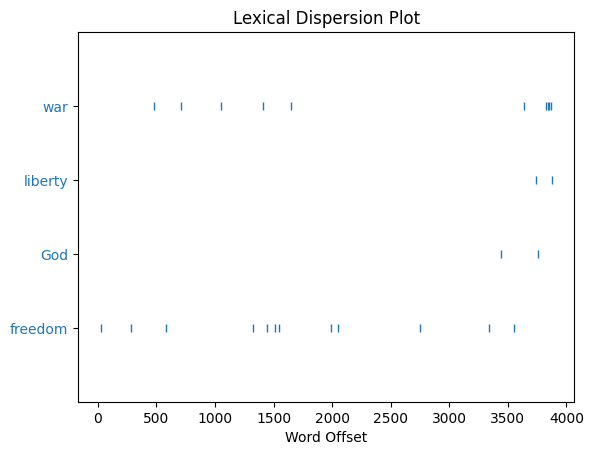

In [17]:
nltk_text1.dispersion_plot(["freedom", "God", "liberty", "war"])   ###

In [18]:
nltk_text1.similar("freedom")  ###

shock terror weapons september soldiers peace firefighters charities
service americorps learning suicide


<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">17b. Using your chosen text:</p>
    <ol style="color:blue"> 
        <li>convert it into a nltk.Text object</li> 
        <li>analyze it using some of the methods shown above. What can you learn?</li>
    </ol>
</div>

## V. Ngrams

What if we want to examine the frequency of multiple-word terms and phrases? 

Instead of splitting texts into words, we can split them into bigrams (two-word combinations), trigrams (three-word combinations), and other *n*grams (terms with *n* number of words).

A great tool for examining the frequency of ngrams over time is [Google's Ngram Viewer.](https://books.google.com/ngrams/) Click on this link and try some different combinations.

<!--<h1>
    <img src = "C:\Users\F0040RP\Documents\Website\images\textAnalysis\google_ngrams_history_subfields.png" style = "width: 80%">
    <img src = "https://books.google.com/ngrams/graph?content=cultural+history%2Cpolitical+history%2Cintellectual+history%2Cmicrohistory%2C+women%27s+history&year_start=1800&year_end=2019&corpus=en-2019&smoothing=3" style="width:80%;">
</h1>-->

18. To create, count, and analyze ngrams from our own texts and corpora, we can use **NLTK**'s **ngrams** function, which reads in a list of tokens and the number of words we want per combination. For example:

In [19]:
n = 2
bigrams = list(nltk.ngrams(["to", "be", ",", "or", "not", "to", "be", ",", "that", "is", "the", "question", "."], n))
print(bigrams)

[('to', 'be'), ('be', ','), (',', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be'), ('be', ','), (',', 'that'), ('that', 'is'), ('is', 'the'), ('the', 'question'), ('question', '.')]


In [20]:
collections.Counter(bigrams)

Counter({('to', 'be'): 2,
         ('be', ','): 2,
         (',', 'or'): 1,
         ('or', 'not'): 1,
         ('not', 'to'): 1,
         (',', 'that'): 1,
         ('that', 'is'): 1,
         ('is', 'the'): 1,
         ('the', 'question'): 1,
         ('question', '.'): 1})

In [21]:
n = 2
n_grams=list(nltk.ngrams(ltokens_ns,n))
print(n_grams)

[('thank', 'much'), ('much', 'mr'), ('mr', 'speaker'), ('speaker', 'vice'), ('vice', 'president'), ('president', 'cheney'), ('cheney', 'members'), ('members', 'congress'), ('congress', 'distinguished'), ('distinguished', 'guests'), ('guests', 'fellow'), ('fellow', 'citizens'), ('citizens', 'gather'), ('gather', 'tonight'), ('tonight', 'nation'), ('nation', 'war'), ('war', 'economy'), ('economy', 'recession'), ('recession', 'civilized'), ('civilized', 'world'), ('world', 'faces'), ('faces', 'unprecedented'), ('unprecedented', 'dangers'), ('dangers', 'yet'), ('yet', 'state'), ('state', 'union'), ('union', 'never'), ('never', 'stronger'), ('stronger', 'last'), ('last', 'met'), ('met', 'hour'), ('hour', 'shock'), ('shock', 'suffering'), ('suffering', '4'), ('4', 'short'), ('short', 'months'), ('months', 'nation'), ('nation', 'comforted'), ('comforted', 'victims'), ('victims', 'begun'), ('begun', 'rebuild'), ('rebuild', 'new'), ('new', 'york'), ('york', 'pentagon'), ('pentagon', 'rallied'),

In [22]:
collections.Counter(n_grams).most_common()

[(('united', 'states'), 6),
 (('september', '11th'), 5),
 (('good', 'jobs'), 5),
 (('war', 'terror'), 4),
 (('weapons', 'mass'), 4),
 (('mass', 'destruction'), 4),
 (('american', 'people'), 4),
 (('must', 'act'), 4),
 (('homeland', 'security'), 4),
 (('freedom', 'corps'), 4),
 (('training', 'camps'), 3),
 (('men', 'women'), 3),
 (('throughout', 'world'), 3),
 (('america', 'allies'), 3),
 (('win', 'war'), 3),
 (('war', 'protect'), 3),
 (('create', 'jobs'), 3),
 (('economic', 'security'), 3),
 (('ask', 'congress'), 3),
 (('tax', 'relief'), 3),
 (('usa', 'freedom'), 3),
 (('civilized', 'world'), 2),
 (('new', 'york'), 2),
 (('last', 'time'), 2),
 (('armed', 'forces'), 2),
 (('nation', 'many'), 2),
 (('tens', 'thousands'), 2),
 (('terrorist', 'camps'), 2),
 (('nuclear', 'weapons'), 2),
 (('friends', 'allies'), 2),
 (('destruction', 'regimes'), 2),
 (('people', 'hope'), 2),
 (('must', 'always'), 2),
 (('protect', 'homeland'), 2),
 (('congress', 'join'), 2),
 (('america', 'must'), 2),
 (('re

<div class="alert alert-info" role="alert" style="color:blue"><h3>Exercises for Part VII</h3>
    
<p>19. Create ngrams from your chosen text. Try bigrams, trigrams, and even ngrams of length 4. Then identify the most common of these ngrams. Are these results useful to understanding this particular text?</p>

</div>